In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

In [2]:
customers = pd.read_csv(r'C:\Users\Nutzer\OneDrive\Desktop\viabill\customers.csv')

In [3]:
customers

,customerID,sex,age,residentialAddress,postalAddress,income
0,1,1,25,28 Irvine Place,28 Irvine Place,NaN
1,2,1,19,72 Bertha Street,72 Bertha Street,43200.0
2,3,2,22,63 Ladberry Street,63 Ladberry Street,70200.0
3,4,0,24,98 Linneman Close,98 Linneman Close,93900.0
4,5,1,53,56 Salonica Road,56 Salonica Road,77000.0
...,...,...,...,...,...,...
499995,499996,1,68,95 Argyle Parade,95 Argyle Parade,40500.0
499996,499997,2,22,34 Bearke Place,34 Bearke Place,44900.0
499997,499998,1,27,95 Glenhurst Street,95 Glenhurst Street,48700.0
499998,499999,1,55,34 Kiandra Close,34 Kiandra Close,7600.0


In [4]:
transactions = pd.read_csv(r'C:\Users\Nutzer\OneDrive\Desktop\viabill\transactions.csv')

In [5]:
transactions

,transactionID,shopID,customerID,price,paytmentStatus1,paytmentStatus2,paytmentStatus3,paytmentStatus4
0,1,114,2869.0,140,0,0,0,0
1,2,855,124077.0,70,0,0,0,0
2,3,752,86184.0,85,0,0,0,0
3,4,246,248861.0,43,1,0,0,0
4,5,973,162112.0,127,0,0,0,0
...,...,...,...,...,...,...,...,...
1999995,1999996,758,333312.0,12,0,0,1,1
1999996,1999997,932,31802.0,145,0,2,2,2
1999997,1999998,932,449391.0,19,0,0,0,0
1999998,1999999,878,433902.0,198,0,1,0,0


# Select transactions that you use as credit applications

In [6]:


credit_applications = transactions.groupby(['customerID'], as_index=False).agg({'transactionID':'max'})


credit_applications

,customerID,transactionID
0,1.0,1697842
1,2.0,1834257
2,3.0,1974624
3,4.0,1536291
4,5.0,661121
...,...,...
490528,499996.0,665043
490529,499997.0,1756533
490530,499998.0,1628579
490531,499999.0,1722718


In [7]:
transactions.columns

Index(['transactionID', 'shopID', 'customerID', 'price', 'paytmentStatus1',
       'paytmentStatus2', 'paytmentStatus3', 'paytmentStatus4'],
      dtype='object')

In [8]:
new_trans = credit_applications.merge(transactions[['transactionID','price', 'paytmentStatus1',
       'paytmentStatus2', 'paytmentStatus3', 'paytmentStatus4']], on='transactionID', how='left')

In [9]:
new_trans

,customerID,transactionID,price,paytmentStatus1,paytmentStatus2,paytmentStatus3,paytmentStatus4
0,1.0,1697842,147,0,0,0,0
1,2.0,1834257,150,0,0,0,0
2,3.0,1974624,140,0,0,0,0
3,4.0,1536291,136,0,1,0,0
4,5.0,661121,181,0,0,0,0
...,...,...,...,...,...,...,...
490528,499996.0,665043,27,0,0,0,0
490529,499997.0,1756533,127,0,0,1,0
490530,499998.0,1628579,157,0,0,0,0
490531,499999.0,1722718,171,0,0,0,0


# join result from previous point with customer Income - if Income is Missing replace it with -999 value

In [10]:
# Join transactions df with customers df on customerID
df = pd.merge(new_trans, customers, on='customerID', how='left')

# Replace missing Income values with 999
df['income'] = df['income'].fillna(999)

# create “trans_price_avg_lst3”

In [11]:
df['trans_price_avg_lst3'] = df.groupby('customerID')['price'].rolling(3, min_periods=1).mean().reset_index(0, drop=True)
df

,customerID,transactionID,price,paytmentStatus1,paytmentStatus2,paytmentStatus3,paytmentStatus4,sex,age,residentialAddress,postalAddress,income,trans_price_avg_lst3
0,1.0,1697842,147,0,0,0,0,1,25,28 Irvine Place,28 Irvine Place,999.0,147.0
1,2.0,1834257,150,0,0,0,0,1,19,72 Bertha Street,72 Bertha Street,43200.0,150.0
2,3.0,1974624,140,0,0,0,0,2,22,63 Ladberry Street,63 Ladberry Street,70200.0,140.0
3,4.0,1536291,136,0,1,0,0,0,24,98 Linneman Close,98 Linneman Close,93900.0,136.0
4,5.0,661121,181,0,0,0,0,1,53,56 Salonica Road,56 Salonica Road,77000.0,181.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
490528,499996.0,665043,27,0,0,0,0,1,68,95 Argyle Parade,95 Argyle Parade,40500.0,27.0
490529,499997.0,1756533,127,0,0,1,0,2,22,34 Bearke Place,34 Bearke Place,44900.0,127.0
490530,499998.0,1628579,157,0,0,0,0,1,27,95 Glenhurst Street,95 Glenhurst Street,48700.0,157.0
490531,499999.0,1722718,171,0,0,0,0,1,55,34 Kiandra Close,34 Kiandra Close,7600.0,171.0


In [12]:
df.columns

Index(['customerID', 'transactionID', 'price', 'paytmentStatus1',
       'paytmentStatus2', 'paytmentStatus3', 'paytmentStatus4', 'sex', 'age',
       'residentialAddress', 'postalAddress', 'income',
       'trans_price_avg_lst3'],
      dtype='object')

In [13]:
df.drop(columns=['residentialAddress', 'postalAddress'], axis=1, inplace=True)

In [14]:
df

,customerID,transactionID,price,paytmentStatus1,paytmentStatus2,paytmentStatus3,paytmentStatus4,sex,age,income,trans_price_avg_lst3
0,1.0,1697842,147,0,0,0,0,1,25,999.0,147.0
1,2.0,1834257,150,0,0,0,0,1,19,43200.0,150.0
2,3.0,1974624,140,0,0,0,0,2,22,70200.0,140.0
3,4.0,1536291,136,0,1,0,0,0,24,93900.0,136.0
4,5.0,661121,181,0,0,0,0,1,53,77000.0,181.0
...,...,...,...,...,...,...,...,...,...,...,...
490528,499996.0,665043,27,0,0,0,0,1,68,40500.0,27.0
490529,499997.0,1756533,127,0,0,1,0,2,22,44900.0,127.0
490530,499998.0,1628579,157,0,0,0,0,1,27,48700.0,157.0
490531,499999.0,1722718,171,0,0,0,0,1,55,7600.0,171.0


In [15]:
df['combined'] = df['paytmentStatus1'].astype(str) + df['paytmentStatus2'].astype(str) + df['paytmentStatus3'].astype(str) + df['paytmentStatus4'].astype(str)

df

,customerID,transactionID,price,paytmentStatus1,paytmentStatus2,paytmentStatus3,paytmentStatus4,sex,age,income,trans_price_avg_lst3,combined
0,1.0,1697842,147,0,0,0,0,1,25,999.0,147.0,0000
1,2.0,1834257,150,0,0,0,0,1,19,43200.0,150.0,0000
2,3.0,1974624,140,0,0,0,0,2,22,70200.0,140.0,0000
3,4.0,1536291,136,0,1,0,0,0,24,93900.0,136.0,0100
4,5.0,661121,181,0,0,0,0,1,53,77000.0,181.0,0000
...,...,...,...,...,...,...,...,...,...,...,...,...
490528,499996.0,665043,27,0,0,0,0,1,68,40500.0,27.0,0000
490529,499997.0,1756533,127,0,0,1,0,2,22,44900.0,127.0,0010
490530,499998.0,1628579,157,0,0,0,0,1,27,48700.0,157.0,0000
490531,499999.0,1722718,171,0,0,0,0,1,55,7600.0,171.0,0000


In [17]:
# Define function to check for default
# our customer divided into 3 groups. paid / paid but late / not paid
# i consider 'paid but late' customers as future 'not paid' ones.
# from practice if customer once had overdue days in credit , customer 90% is going to be bad

def check_default(combined):
    if '2' and '1' in combined:
        return 1
    else:
        return 0
# Apply function to create default column
df['default'] = df['combined'].apply(check_default)

df

,customerID,transactionID,price,paytmentStatus1,paytmentStatus2,paytmentStatus3,paytmentStatus4,sex,age,income,trans_price_avg_lst3,combined,default
0,1.0,1697842,147,0,0,0,0,1,25,999.0,147.0,0000,0
1,2.0,1834257,150,0,0,0,0,1,19,43200.0,150.0,0000,0
2,3.0,1974624,140,0,0,0,0,2,22,70200.0,140.0,0000,0
3,4.0,1536291,136,0,1,0,0,0,24,93900.0,136.0,0100,1
4,5.0,661121,181,0,0,0,0,1,53,77000.0,181.0,0000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
490528,499996.0,665043,27,0,0,0,0,1,68,40500.0,27.0,0000,0
490529,499997.0,1756533,127,0,0,1,0,2,22,44900.0,127.0,0010,1
490530,499998.0,1628579,157,0,0,0,0,1,27,48700.0,157.0,0000,0
490531,499999.0,1722718,171,0,0,0,0,1,55,7600.0,171.0,0000,0


In [18]:
df.default.value_counts()

# by combining 'paid but late' customers with 'not paid', we got result below.

# i also checked to combine and consider'paid' and 'paid but late' customers as good customers
# but in this way data became too much imbalanced . 0 - 445k , 1-45k and bad rate was too low ~ 1%

# now bad rate is ~2.9%

0    346265
1    144268
Name: default, dtype: int64

In [19]:
df

,customerID,transactionID,price,paytmentStatus1,paytmentStatus2,paytmentStatus3,paytmentStatus4,sex,age,income,trans_price_avg_lst3,combined,default
0,1.0,1697842,147,0,0,0,0,1,25,999.0,147.0,0000,0
1,2.0,1834257,150,0,0,0,0,1,19,43200.0,150.0,0000,0
2,3.0,1974624,140,0,0,0,0,2,22,70200.0,140.0,0000,0
3,4.0,1536291,136,0,1,0,0,0,24,93900.0,136.0,0100,1
4,5.0,661121,181,0,0,0,0,1,53,77000.0,181.0,0000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
490528,499996.0,665043,27,0,0,0,0,1,68,40500.0,27.0,0000,0
490529,499997.0,1756533,127,0,0,1,0,2,22,44900.0,127.0,0010,1
490530,499998.0,1628579,157,0,0,0,0,1,27,48700.0,157.0,0000,0
490531,499999.0,1722718,171,0,0,0,0,1,55,7600.0,171.0,0000,0


In [20]:
df.drop(columns=['paytmentStatus1','paytmentStatus2', 'paytmentStatus3', 'paytmentStatus4','combined'],axis=1,inplace=True)

In [21]:
df

,customerID,transactionID,price,sex,age,income,trans_price_avg_lst3,default
0,1.0,1697842,147,1,25,999.0,147.0,0
1,2.0,1834257,150,1,19,43200.0,150.0,0
2,3.0,1974624,140,2,22,70200.0,140.0,0
3,4.0,1536291,136,0,24,93900.0,136.0,1
4,5.0,661121,181,1,53,77000.0,181.0,0
...,...,...,...,...,...,...,...,...
490528,499996.0,665043,27,1,68,40500.0,27.0,0
490529,499997.0,1756533,127,2,22,44900.0,127.0,1
490530,499998.0,1628579,157,1,27,48700.0,157.0,0
490531,499999.0,1722718,171,1,55,7600.0,171.0,0


In [22]:
# add new features
# it will give us an idea of how much customers are willing to spend on products relative to their income
# as the price of the product is debt of the customer we can create feature below
df['income_to_debt_ratio'] = np.where(df['income']!=999.0,df['income'] / df['price'],999) 
df

,customerID,transactionID,price,sex,age,income,trans_price_avg_lst3,default,income_to_debt_ratio
0,1.0,1697842,147,1,25,999.0,147.0,0,999.000000
1,2.0,1834257,150,1,19,43200.0,150.0,0,288.000000
2,3.0,1974624,140,2,22,70200.0,140.0,0,501.428571
3,4.0,1536291,136,0,24,93900.0,136.0,1,690.441176
4,5.0,661121,181,1,53,77000.0,181.0,0,425.414365
...,...,...,...,...,...,...,...,...,...
490528,499996.0,665043,27,1,68,40500.0,27.0,0,1500.000000
490529,499997.0,1756533,127,2,22,44900.0,127.0,1,353.543307
490530,499998.0,1628579,157,1,27,48700.0,157.0,0,310.191083
490531,499999.0,1722718,171,1,55,7600.0,171.0,0,44.444444


In [23]:
# create DTI (debt to income ratio)

df['debt_to_income_ratio'] = np.where(df['income']!=999.0,df['price'] / df['income'],999) 
df

,customerID,transactionID,price,sex,age,income,trans_price_avg_lst3,default,income_to_debt_ratio,debt_to_income_ratio
0,1.0,1697842,147,1,25,999.0,147.0,0,999.000000,999.000000
1,2.0,1834257,150,1,19,43200.0,150.0,0,288.000000,0.003472
2,3.0,1974624,140,2,22,70200.0,140.0,0,501.428571,0.001994
3,4.0,1536291,136,0,24,93900.0,136.0,1,690.441176,0.001448
4,5.0,661121,181,1,53,77000.0,181.0,0,425.414365,0.002351
...,...,...,...,...,...,...,...,...,...,...
490528,499996.0,665043,27,1,68,40500.0,27.0,0,1500.000000,0.000667
490529,499997.0,1756533,127,2,22,44900.0,127.0,1,353.543307,0.002829
490530,499998.0,1628579,157,1,27,48700.0,157.0,0,310.191083,0.003224
490531,499999.0,1722718,171,1,55,7600.0,171.0,0,44.444444,0.022500


In [24]:
# there are 4 installments
# so of we divide debt to 4 we will get weekly installment or payment of customer

df['payment'] = df['price'] / 4

df

,customerID,transactionID,price,sex,age,income,trans_price_avg_lst3,default,income_to_debt_ratio,debt_to_income_ratio,payment
0,1.0,1697842,147,1,25,999.0,147.0,0,999.000000,999.000000,36.75
1,2.0,1834257,150,1,19,43200.0,150.0,0,288.000000,0.003472,37.50
2,3.0,1974624,140,2,22,70200.0,140.0,0,501.428571,0.001994,35.00
3,4.0,1536291,136,0,24,93900.0,136.0,1,690.441176,0.001448,34.00
4,5.0,661121,181,1,53,77000.0,181.0,0,425.414365,0.002351,45.25
...,...,...,...,...,...,...,...,...,...,...,...
490528,499996.0,665043,27,1,68,40500.0,27.0,0,1500.000000,0.000667,6.75
490529,499997.0,1756533,127,2,22,44900.0,127.0,1,353.543307,0.002829,31.75
490530,499998.0,1628579,157,1,27,48700.0,157.0,0,310.191083,0.003224,39.25
490531,499999.0,1722718,171,1,55,7600.0,171.0,0,44.444444,0.022500,42.75


In [25]:
# given payment feature we can calculate PTI (payment to income ratio)
df['payment_to_income_ratio'] = np.where(df['income']!=999.0,df['payment'] / df['income'],999) 
df

,customerID,transactionID,price,sex,age,income,trans_price_avg_lst3,default,income_to_debt_ratio,debt_to_income_ratio,payment,payment_to_income_ratio
0,1.0,1697842,147,1,25,999.0,147.0,0,999.000000,999.000000,36.75,999.000000
1,2.0,1834257,150,1,19,43200.0,150.0,0,288.000000,0.003472,37.50,0.000868
2,3.0,1974624,140,2,22,70200.0,140.0,0,501.428571,0.001994,35.00,0.000499
3,4.0,1536291,136,0,24,93900.0,136.0,1,690.441176,0.001448,34.00,0.000362
4,5.0,661121,181,1,53,77000.0,181.0,0,425.414365,0.002351,45.25,0.000588
...,...,...,...,...,...,...,...,...,...,...,...,...
490528,499996.0,665043,27,1,68,40500.0,27.0,0,1500.000000,0.000667,6.75,0.000167
490529,499997.0,1756533,127,2,22,44900.0,127.0,1,353.543307,0.002829,31.75,0.000707
490530,499998.0,1628579,157,1,27,48700.0,157.0,0,310.191083,0.003224,39.25,0.000806
490531,499999.0,1722718,171,1,55,7600.0,171.0,0,44.444444,0.022500,42.75,0.005625


In [26]:
def debt_per_age(row):
    if row['age'] <= 20:
        age_group = 1
    elif row['age'] <= 46:
        age_group = 2
    elif row['age'] <= 52:
        age_group = 3
    else:
        age_group = 4
    return row['price'] / age_group

df['debt_per_age_group'] = df.apply(debt_per_age, axis=1)
df

,customerID,transactionID,price,sex,age,income,trans_price_avg_lst3,default,income_to_debt_ratio,debt_to_income_ratio,payment,payment_to_income_ratio,debt_per_age_group
0,1.0,1697842,147,1,25,999.0,147.0,0,999.000000,999.000000,36.75,999.000000,73.50
1,2.0,1834257,150,1,19,43200.0,150.0,0,288.000000,0.003472,37.50,0.000868,150.00
2,3.0,1974624,140,2,22,70200.0,140.0,0,501.428571,0.001994,35.00,0.000499,70.00
3,4.0,1536291,136,0,24,93900.0,136.0,1,690.441176,0.001448,34.00,0.000362,68.00
4,5.0,661121,181,1,53,77000.0,181.0,0,425.414365,0.002351,45.25,0.000588,45.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
490528,499996.0,665043,27,1,68,40500.0,27.0,0,1500.000000,0.000667,6.75,0.000167,6.75
490529,499997.0,1756533,127,2,22,44900.0,127.0,1,353.543307,0.002829,31.75,0.000707,63.50
490530,499998.0,1628579,157,1,27,48700.0,157.0,0,310.191083,0.003224,39.25,0.000806,78.50
490531,499999.0,1722718,171,1,55,7600.0,171.0,0,44.444444,0.022500,42.75,0.005625,42.75


In [27]:
def payment_per_age(row):
    if row['age'] <= 20:
        age_group = 1
    elif row['age'] <= 46:
        age_group = 2
    elif row['age'] <= 52:
        age_group = 3
    else:
        age_group = 4
    return row['payment'] / age_group

df['payment_per_age_group'] = df.apply(payment_per_age, axis=1)
df

,customerID,transactionID,price,sex,age,income,trans_price_avg_lst3,default,income_to_debt_ratio,debt_to_income_ratio,payment,payment_to_income_ratio,debt_per_age_group,payment_per_age_group
0,1.0,1697842,147,1,25,999.0,147.0,0,999.000000,999.000000,36.75,999.000000,73.50,18.3750
1,2.0,1834257,150,1,19,43200.0,150.0,0,288.000000,0.003472,37.50,0.000868,150.00,37.5000
2,3.0,1974624,140,2,22,70200.0,140.0,0,501.428571,0.001994,35.00,0.000499,70.00,17.5000
3,4.0,1536291,136,0,24,93900.0,136.0,1,690.441176,0.001448,34.00,0.000362,68.00,17.0000
4,5.0,661121,181,1,53,77000.0,181.0,0,425.414365,0.002351,45.25,0.000588,45.25,11.3125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490528,499996.0,665043,27,1,68,40500.0,27.0,0,1500.000000,0.000667,6.75,0.000167,6.75,1.6875
490529,499997.0,1756533,127,2,22,44900.0,127.0,1,353.543307,0.002829,31.75,0.000707,63.50,15.8750
490530,499998.0,1628579,157,1,27,48700.0,157.0,0,310.191083,0.003224,39.25,0.000806,78.50,19.6250
490531,499999.0,1722718,171,1,55,7600.0,171.0,0,44.444444,0.022500,42.75,0.005625,42.75,10.6875


In [28]:
def income_per_age(row):
    if row['age'] <= 20:
        age_group = 1
    elif row['age'] <= 46:
        age_group = 2
    elif row['age'] <= 52:
        age_group = 3
    else:
        age_group = 4
    return row['income'] / age_group

df['income_per_age_group'] = df.apply(income_per_age, axis=1)
df['income_per_age_group'] = np.where(df['income']!=999.0,df['income_per_age_group'],999.0)
df

,customerID,transactionID,price,sex,age,income,trans_price_avg_lst3,default,income_to_debt_ratio,debt_to_income_ratio,payment,payment_to_income_ratio,debt_per_age_group,payment_per_age_group,income_per_age_group
0,1.0,1697842,147,1,25,999.0,147.0,0,999.000000,999.000000,36.75,999.000000,73.50,18.3750,999.0
1,2.0,1834257,150,1,19,43200.0,150.0,0,288.000000,0.003472,37.50,0.000868,150.00,37.5000,43200.0
2,3.0,1974624,140,2,22,70200.0,140.0,0,501.428571,0.001994,35.00,0.000499,70.00,17.5000,35100.0
3,4.0,1536291,136,0,24,93900.0,136.0,1,690.441176,0.001448,34.00,0.000362,68.00,17.0000,46950.0
4,5.0,661121,181,1,53,77000.0,181.0,0,425.414365,0.002351,45.25,0.000588,45.25,11.3125,19250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490528,499996.0,665043,27,1,68,40500.0,27.0,0,1500.000000,0.000667,6.75,0.000167,6.75,1.6875,10125.0
490529,499997.0,1756533,127,2,22,44900.0,127.0,1,353.543307,0.002829,31.75,0.000707,63.50,15.8750,22450.0
490530,499998.0,1628579,157,1,27,48700.0,157.0,0,310.191083,0.003224,39.25,0.000806,78.50,19.6250,24350.0
490531,499999.0,1722718,171,1,55,7600.0,171.0,0,44.444444,0.022500,42.75,0.005625,42.75,10.6875,1900.0


In [29]:
df.dtypes

customerID                 float64
transactionID                int64
price                        int64
sex                          int64
age                          int64
income                     float64
trans_price_avg_lst3       float64
default                      int64
income_to_debt_ratio       float64
debt_to_income_ratio       float64
payment                    float64
payment_to_income_ratio    float64
debt_per_age_group         float64
payment_per_age_group      float64
income_per_age_group       float64
dtype: object

In [30]:
df['customerID'] = df['customerID'].astype(int)

In [31]:
df['customerID'] = df['customerID'].astype(str).str.zfill(7)
df['transactionID'] = df['transactionID'].astype(str)

df

,customerID,transactionID,price,sex,age,income,trans_price_avg_lst3,default,income_to_debt_ratio,debt_to_income_ratio,payment,payment_to_income_ratio,debt_per_age_group,payment_per_age_group,income_per_age_group
0,0000001,1697842,147,1,25,999.0,147.0,0,999.000000,999.000000,36.75,999.000000,73.50,18.3750,999.0
1,0000002,1834257,150,1,19,43200.0,150.0,0,288.000000,0.003472,37.50,0.000868,150.00,37.5000,43200.0
2,0000003,1974624,140,2,22,70200.0,140.0,0,501.428571,0.001994,35.00,0.000499,70.00,17.5000,35100.0
3,0000004,1536291,136,0,24,93900.0,136.0,1,690.441176,0.001448,34.00,0.000362,68.00,17.0000,46950.0
4,0000005,661121,181,1,53,77000.0,181.0,0,425.414365,0.002351,45.25,0.000588,45.25,11.3125,19250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490528,0499996,665043,27,1,68,40500.0,27.0,0,1500.000000,0.000667,6.75,0.000167,6.75,1.6875,10125.0
490529,0499997,1756533,127,2,22,44900.0,127.0,1,353.543307,0.002829,31.75,0.000707,63.50,15.8750,22450.0
490530,0499998,1628579,157,1,27,48700.0,157.0,0,310.191083,0.003224,39.25,0.000806,78.50,19.6250,24350.0
490531,0499999,1722718,171,1,55,7600.0,171.0,0,44.444444,0.022500,42.75,0.005625,42.75,10.6875,1900.0


In [32]:
df.dtypes

customerID                  object
transactionID               object
price                        int64
sex                          int64
age                          int64
income                     float64
trans_price_avg_lst3       float64
default                      int64
income_to_debt_ratio       float64
debt_to_income_ratio       float64
payment                    float64
payment_to_income_ratio    float64
debt_per_age_group         float64
payment_per_age_group      float64
income_per_age_group       float64
dtype: object

# Check if there is a dependency between age and sex in the data – use statistical test if applicable

In [33]:
# Check if there is a dependency between age and sex in the data

from scipy.stats import pearsonr

corr, p_value = pearsonr(df['sex'], df['age'])
print('correlation coef: ',corr)
print('p value: ', p_value)

#we can conclude that there is a too very weak positive correlation between age and sex
# p value considered to be lower than 0.05, hence this correlation is statistically not significant at the 0.31 level.

correlation coef:  0.001435107992500123
p value:  0.3148391817015066


# propose customers segments that we could use when we want to send emails with offers

In [34]:
df

,customerID,transactionID,price,sex,age,income,trans_price_avg_lst3,default,income_to_debt_ratio,debt_to_income_ratio,payment,payment_to_income_ratio,debt_per_age_group,payment_per_age_group,income_per_age_group
0,0000001,1697842,147,1,25,999.0,147.0,0,999.000000,999.000000,36.75,999.000000,73.50,18.3750,999.0
1,0000002,1834257,150,1,19,43200.0,150.0,0,288.000000,0.003472,37.50,0.000868,150.00,37.5000,43200.0
2,0000003,1974624,140,2,22,70200.0,140.0,0,501.428571,0.001994,35.00,0.000499,70.00,17.5000,35100.0
3,0000004,1536291,136,0,24,93900.0,136.0,1,690.441176,0.001448,34.00,0.000362,68.00,17.0000,46950.0
4,0000005,661121,181,1,53,77000.0,181.0,0,425.414365,0.002351,45.25,0.000588,45.25,11.3125,19250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490528,0499996,665043,27,1,68,40500.0,27.0,0,1500.000000,0.000667,6.75,0.000167,6.75,1.6875,10125.0
490529,0499997,1756533,127,2,22,44900.0,127.0,1,353.543307,0.002829,31.75,0.000707,63.50,15.8750,22450.0
490530,0499998,1628579,157,1,27,48700.0,157.0,0,310.191083,0.003224,39.25,0.000806,78.50,19.6250,24350.0
490531,0499999,1722718,171,1,55,7600.0,171.0,0,44.444444,0.022500,42.75,0.005625,42.75,10.6875,1900.0


In [35]:
segments = df.groupby('default').mean()

segments

C:\Users\Nutzer\AppData\Local\Temp\ipykernel_416\2576373423.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  segments = df.groupby('default').mean()


,price,sex,age,income,trans_price_avg_lst3,income_to_debt_ratio,debt_to_income_ratio,payment,payment_to_income_ratio,debt_per_age_group,payment_per_age_group,income_per_age_group
default,,,,,,,,,,,,
0,101.562448,1.163947,44.631369,49017.440790,101.562448,1102.897477,NaN,25.390612,NaN,40.877373,10.219343,19758.263474
1,101.708938,1.117788,44.629031,49029.739644,101.708938,1099.935636,NaN,25.427234,NaN,40.921883,10.230471,19707.103185


# Perform exploratory data analysis (EDA) and present interesting findings related to credit risk

In [36]:
df

,customerID,transactionID,price,sex,age,income,trans_price_avg_lst3,default,income_to_debt_ratio,debt_to_income_ratio,payment,payment_to_income_ratio,debt_per_age_group,payment_per_age_group,income_per_age_group
0,0000001,1697842,147,1,25,999.0,147.0,0,999.000000,999.000000,36.75,999.000000,73.50,18.3750,999.0
1,0000002,1834257,150,1,19,43200.0,150.0,0,288.000000,0.003472,37.50,0.000868,150.00,37.5000,43200.0
2,0000003,1974624,140,2,22,70200.0,140.0,0,501.428571,0.001994,35.00,0.000499,70.00,17.5000,35100.0
3,0000004,1536291,136,0,24,93900.0,136.0,1,690.441176,0.001448,34.00,0.000362,68.00,17.0000,46950.0
4,0000005,661121,181,1,53,77000.0,181.0,0,425.414365,0.002351,45.25,0.000588,45.25,11.3125,19250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490528,0499996,665043,27,1,68,40500.0,27.0,0,1500.000000,0.000667,6.75,0.000167,6.75,1.6875,10125.0
490529,0499997,1756533,127,2,22,44900.0,127.0,1,353.543307,0.002829,31.75,0.000707,63.50,15.8750,22450.0
490530,0499998,1628579,157,1,27,48700.0,157.0,0,310.191083,0.003224,39.25,0.000806,78.50,19.6250,24350.0
490531,0499999,1722718,171,1,55,7600.0,171.0,0,44.444444,0.022500,42.75,0.005625,42.75,10.6875,1900.0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 490533 entries, 0 to 490532
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   customerID               490533 non-null  object 
 1   transactionID            490533 non-null  object 
 2   price                    490533 non-null  int64  
 3   sex                      490533 non-null  int64  
 4   age                      490533 non-null  int64  
 5   income                   490533 non-null  float64
 6   trans_price_avg_lst3     490533 non-null  float64
 7   default                  490533 non-null  int64  
 8   income_to_debt_ratio     490533 non-null  float64
 9   debt_to_income_ratio     490533 non-null  float64
 10  payment                  490533 non-null  float64
 11  payment_to_income_ratio  490533 non-null  float64
 12  debt_per_age_group       490533 non-null  float64
 13  payment_per_age_group    490533 non-null  float64
 14  inco

In [38]:
df.describe(include='all')

,customerID,transactionID,price,sex,age,income,trans_price_avg_lst3,default,income_to_debt_ratio,debt_to_income_ratio,payment,payment_to_income_ratio,debt_per_age_group,payment_per_age_group,income_per_age_group
count,490533,490533,490533.000000,490533.000000,490533.000000,490533.000000,490533.000000,490533.000000,490533.000000,4.905330e+05,490533.000000,4.905330e+05,490533.000000,490533.000000,490533.000000
unique,490533,490533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,0000001,1697842,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,101.605531,1.150371,44.630681,49021.057939,101.605531,0.294105,1102.026386,inf,25.401383,inf,40.890464,10.222616,19743.216999
std,NaN,NaN,57.194611,0.477948,16.176352,29417.177692,57.194611,0.455640,2282.361149,NaN,14.298653,NaN,32.039199,8.009800,16124.072465
min,NaN,NaN,3.000000,0.000000,5.000000,0.000000,3.000000,0.000000,0.000000,3.000000e-05,0.750000,7.500000e-06,0.750000,0.187500,0.000000
25%,NaN,NaN,52.000000,1.000000,27.000000,23500.000000,52.000000,0.000000,251.295337,1.062802e-03,13.000000,2.657005e-04,18.000000,4.500000,8033.333333
50%,NaN,NaN,102.000000,1.000000,50.000000,49000.000000,102.000000,0.000000,502.439024,2.072767e-03,25.500000,5.181918e-04,34.750000,8.687500,16766.666667
75%,NaN,NaN,151.000000,1.000000,58.000000,74500.000000,151.000000,1.000000,999.000000,4.316038e-03,37.750000,1.079009e-03,54.000000,13.500000,26150.000000


In [39]:
def missing_values_table(data):
    mis_val=df.isnull().sum()
    mis_val_percent = 100 * mis_val / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
                                                                    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
    return mis_val_table_ren_columns

In [40]:
missing_values_train = missing_values_table(df)
missing_values_train.head()

Your selected dataframe has 15 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [41]:
df.corr()

C:\Users\Nutzer\AppData\Local\Temp\ipykernel_416\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,price,sex,age,income,trans_price_avg_lst3,default,income_to_debt_ratio,debt_to_income_ratio,payment,payment_to_income_ratio,debt_per_age_group,payment_per_age_group,income_per_age_group
price,1.000000,0.000493,0.001014,0.003703,1.000000,0.001167,-0.466884,-0.000034,1.000000,-0.000057,0.718028,0.718028,0.001105
sex,0.000493,1.000000,0.001435,0.002219,0.000493,-0.044004,0.001184,-0.000615,0.000493,-0.000615,-0.000432,-0.000432,0.001744
age,0.001014,0.001435,1.000000,0.001796,0.001014,-0.000066,-0.002233,0.001391,0.001014,0.001390,-0.499607,-0.499607,-0.479324
income,0.003703,0.002219,0.001796,1.000000,0.003703,0.000190,0.268065,-0.233500,0.003703,-0.233451,0.001410,0.001410,0.733026
trans_price_avg_lst3,1.000000,0.000493,0.001014,0.003703,1.000000,0.001167,-0.466884,-0.000034,1.000000,-0.000057,0.718028,0.718028,0.001105
default,0.001167,-0.044004,-0.000066,0.000190,0.001167,1.000000,-0.000591,0.001361,0.001167,0.001361,0.000633,0.000633,-0.001446
income_to_debt_ratio,-0.466884,0.001184,-0.002233,0.268065,-0.466884,-0.000591,1.000000,-0.006528,-0.466884,-0.006511,-0.335475,-0.335475,0.199538
debt_to_income_ratio,-0.000034,-0.000615,0.001391,-0.233500,-0.000034,0.001361,-0.006528,1.000000,-0.000034,1.000000,-0.001644,-0.001644,-0.166187
payment,1.000000,0.000493,0.001014,0.003703,1.000000,0.001167,-0.466884,-0.000034,1.000000,-0.000057,0.718028,0.718028,0.001105
payment_to_income_ratio,-0.000057,-0.000615,0.001390,-0.233451,-0.000057,0.001361,-0.006511,1.000000,-0.000057,1.000000,-0.001660,-0.001660,-0.166151


In [42]:
df.columns

Index(['customerID', 'transactionID', 'price', 'sex', 'age', 'income',
       'trans_price_avg_lst3', 'default', 'income_to_debt_ratio',
       'debt_to_income_ratio', 'payment', 'payment_to_income_ratio',
       'debt_per_age_group', 'payment_per_age_group', 'income_per_age_group'],
      dtype='object')

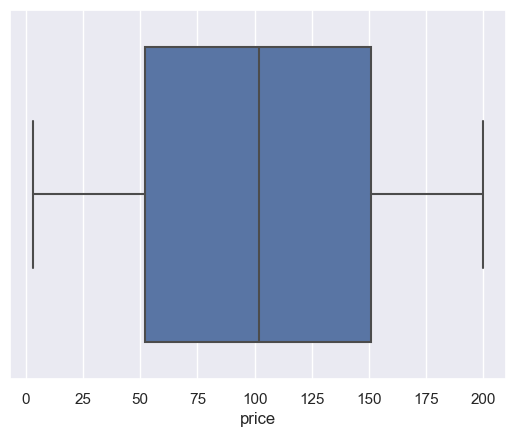

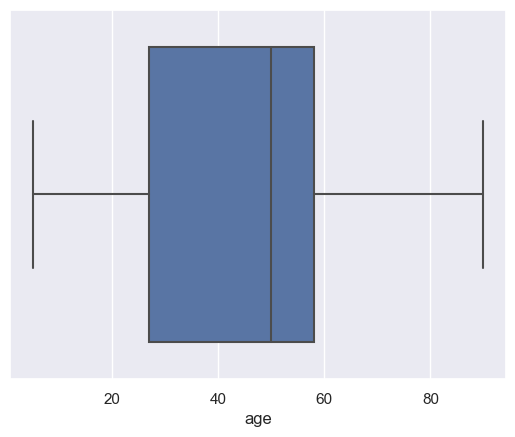

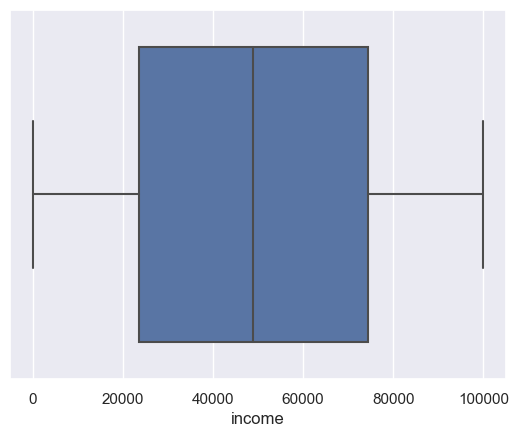

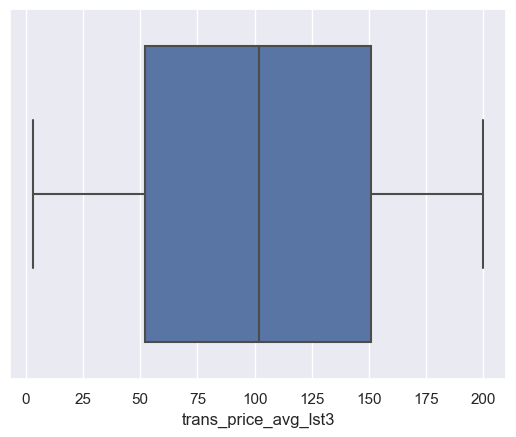

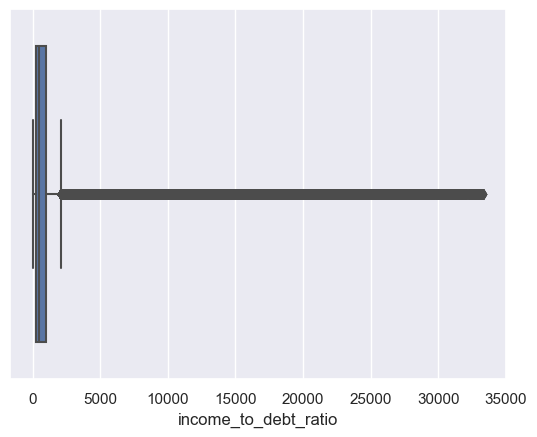

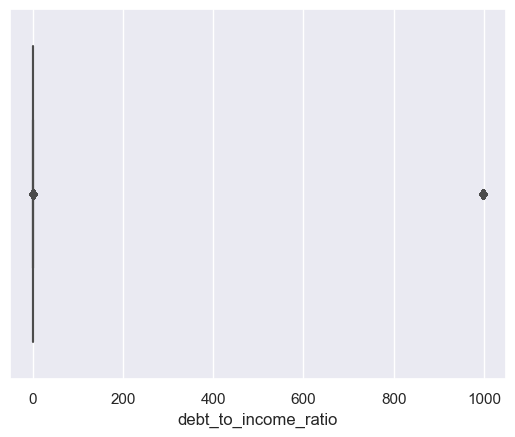

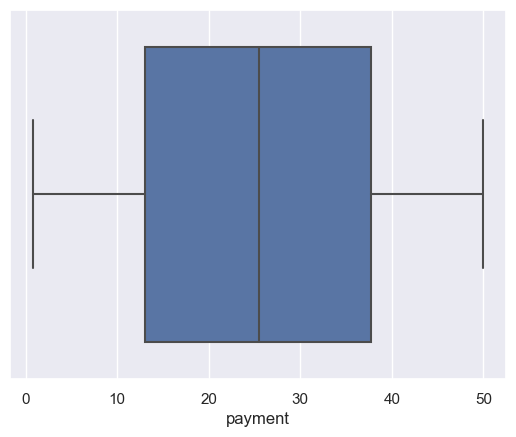

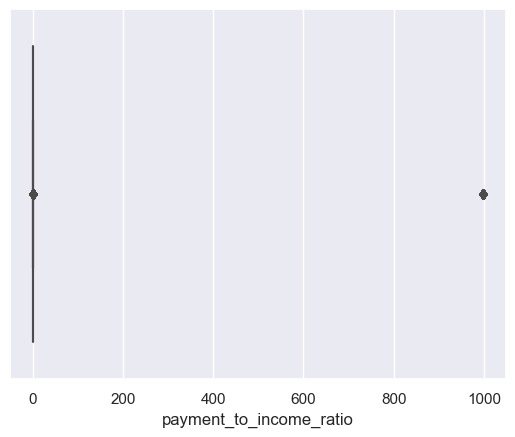

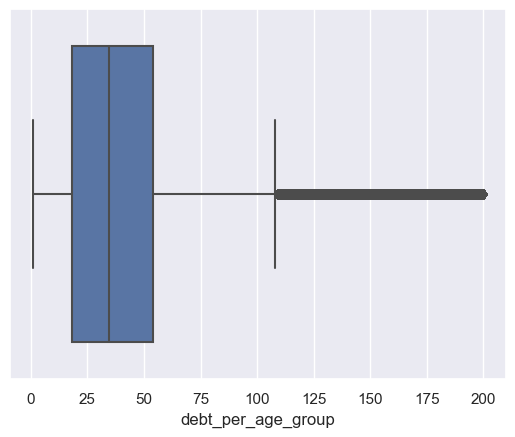

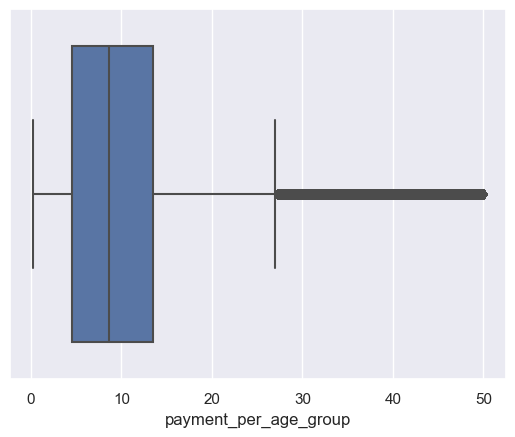

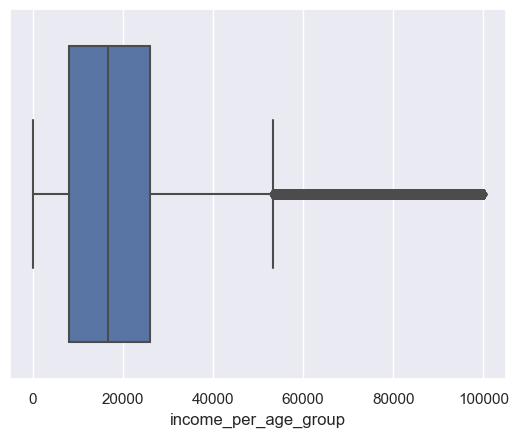

In [43]:
for i in df[['price','age', 'income','trans_price_avg_lst3','income_to_debt_ratio',
       'debt_to_income_ratio', 'payment', 'payment_to_income_ratio',
       'debt_per_age_group', 'payment_per_age_group', 'income_per_age_group']]:
    sns.boxplot(data=df,x=df[i])
    plt.show()

C:\Users\Nutzer\AppData\Local\Temp\ipykernel_416\3386951505.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q1 = df.quantile(0.25)
C:\Users\Nutzer\AppData\Local\Temp\ipykernel_416\3386951505.py:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q3 = df.quantile(0.75)


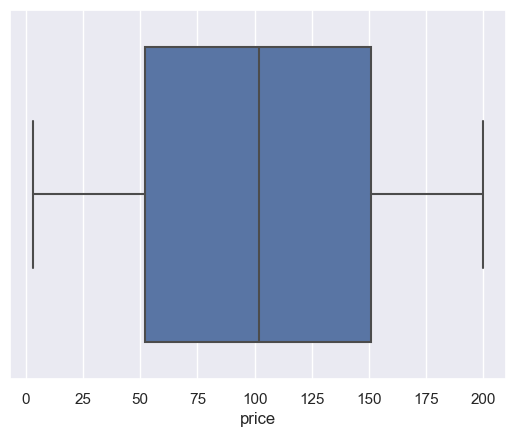

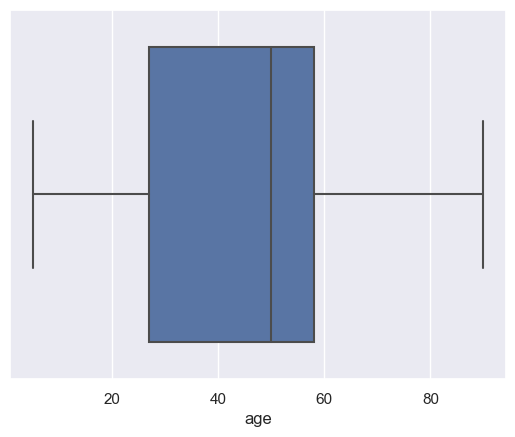

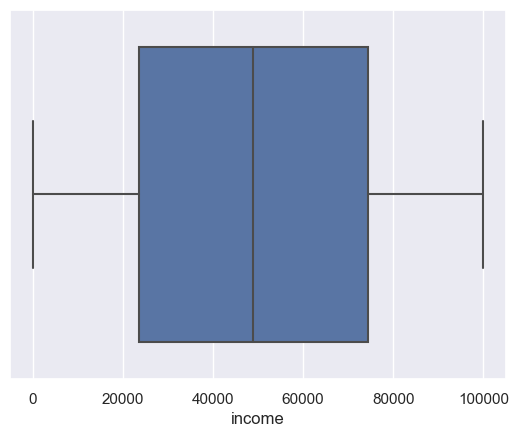

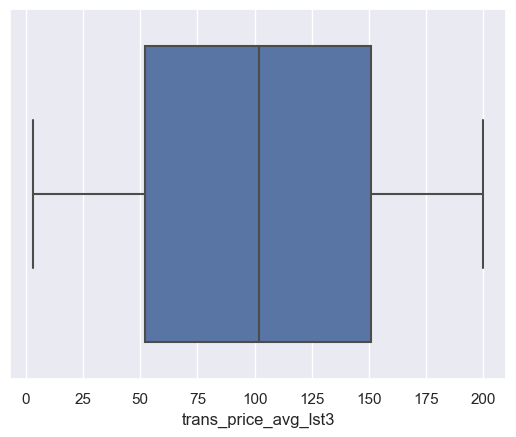

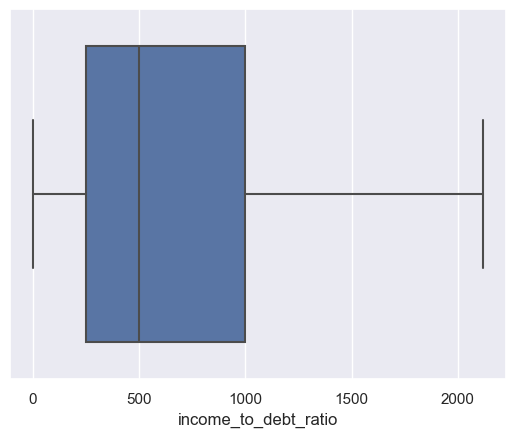

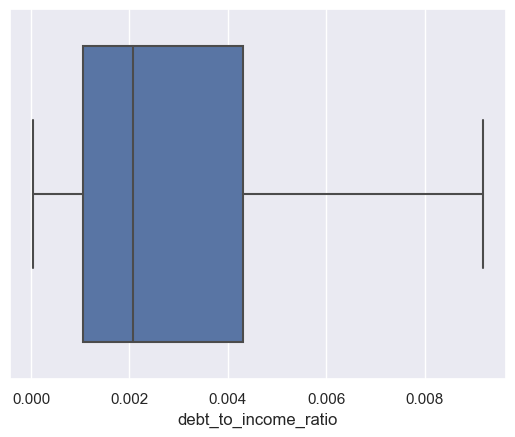

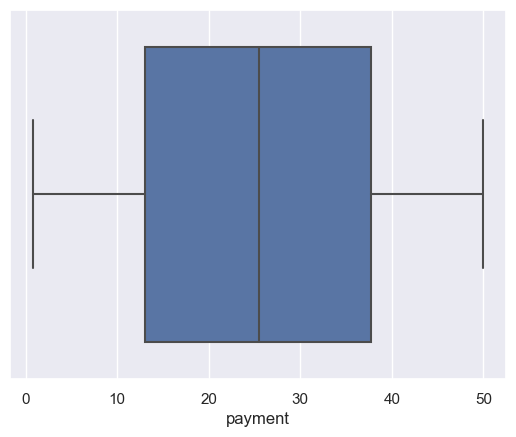

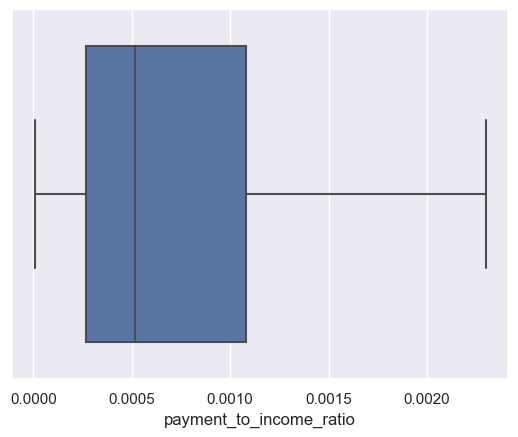

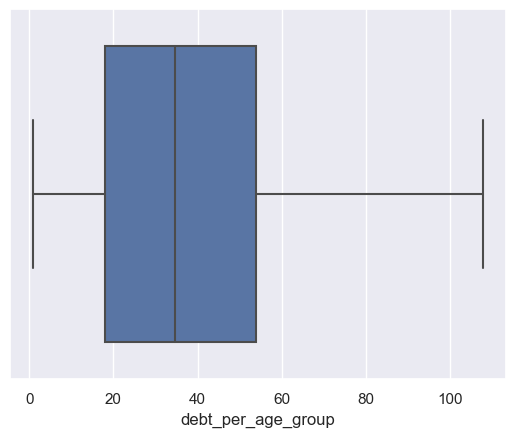

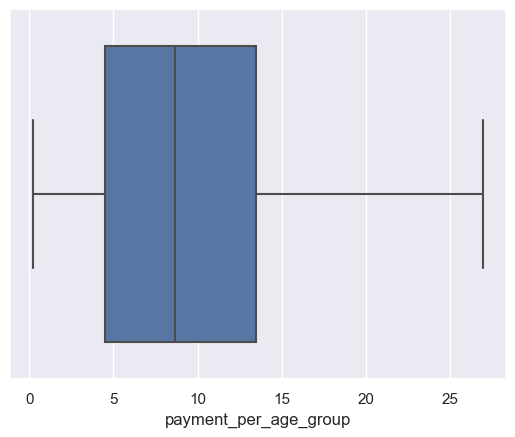

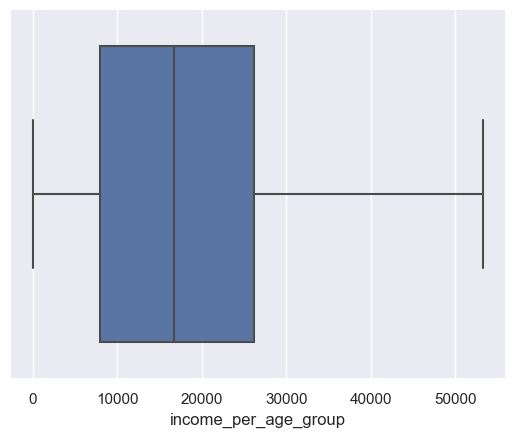

In [45]:
# if there was an outlier in each column i wolud use IQR rules and capping technique

q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
IQR  = q3 - q1
lower = q1 - 1.5 * IQR
upper = q3 + 1.5 * IQR

for i in df[['price','age', 'income','trans_price_avg_lst3','income_to_debt_ratio',
       'debt_to_income_ratio', 'payment', 'payment_to_income_ratio',
       'debt_per_age_group', 'payment_per_age_group', 'income_per_age_group']]:
    df[i] = np.where(df[i]>upper[i],upper[i],df[i])
    df[i] = np.where(df[i]<lower[i],lower[i],df[i])
    sns.boxplot(x = df[i], data = df)
    plt.show()

In [46]:
df.shape

(490533, 15)

In [47]:
df.columns

Index(['customerID', 'transactionID', 'price', 'sex', 'age', 'income',
       'trans_price_avg_lst3', 'default', 'income_to_debt_ratio',
       'debt_to_income_ratio', 'payment', 'payment_to_income_ratio',
       'debt_per_age_group', 'payment_per_age_group', 'income_per_age_group'],
      dtype='object')

In [48]:
df.corr()

C:\Users\Nutzer\AppData\Local\Temp\ipykernel_416\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,price,sex,age,income,trans_price_avg_lst3,default,income_to_debt_ratio,debt_to_income_ratio,payment,payment_to_income_ratio,debt_per_age_group,payment_per_age_group,income_per_age_group
price,1.000000,0.000493,0.001014,0.003703,1.000000,0.001167,-0.702255,0.446726,1.000000,0.446726,0.777415,0.777415,0.002549
sex,0.000493,1.000000,0.001435,0.002219,0.000493,-0.044004,0.000724,-0.000475,0.000493,-0.000475,-0.000278,-0.000278,0.001671
age,0.001014,0.001435,1.000000,0.001796,0.001014,-0.000066,-0.000273,-0.000283,0.001014,-0.000283,-0.500803,-0.500803,-0.476989
income,0.003703,0.002219,0.001796,1.000000,0.003703,0.000190,0.482720,-0.746655,0.003703,-0.746655,0.002338,0.002338,0.793184
trans_price_avg_lst3,1.000000,0.000493,0.001014,0.003703,1.000000,0.001167,-0.702255,0.446726,1.000000,0.446726,0.777415,0.777415,0.002549
default,0.001167,-0.044004,-0.000066,0.000190,0.001167,1.000000,-0.000503,-0.000252,0.001167,-0.000252,0.000531,0.000531,-0.000810
income_to_debt_ratio,-0.702255,0.000724,-0.000273,0.482720,-0.702255,-0.000503,1.000000,-0.668707,-0.702255,-0.668707,-0.556282,-0.556282,0.385541
debt_to_income_ratio,0.446726,-0.000475,-0.000283,-0.746655,0.446726,-0.000252,-0.668707,1.000000,0.446726,1.000000,0.349628,0.349628,-0.602720
payment,1.000000,0.000493,0.001014,0.003703,1.000000,0.001167,-0.702255,0.446726,1.000000,0.446726,0.777415,0.777415,0.002549
payment_to_income_ratio,0.446726,-0.000475,-0.000283,-0.746655,0.446726,-0.000252,-0.668707,1.000000,0.446726,1.000000,0.349628,0.349628,-0.602720


In [49]:
df1 = df[['customerID', 'transactionID', 'default',
       'trans_price_avg_lst3', 'payment',
       'debt_to_income_ratio', 'income_per_age_group']]

In [50]:
df1.corr()

C:\Users\Nutzer\AppData\Local\Temp\ipykernel_416\473017434.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()


,default,trans_price_avg_lst3,payment,debt_to_income_ratio,income_per_age_group
default,1.000000,0.001167,0.001167,-0.000252,-0.000810
trans_price_avg_lst3,0.001167,1.000000,1.000000,0.446726,0.002549
payment,0.001167,1.000000,1.000000,0.446726,0.002549
debt_to_income_ratio,-0.000252,0.446726,0.446726,1.000000,-0.602720
income_per_age_group,-0.000810,0.002549,0.002549,-0.602720,1.000000


# Build model/models that predict if customer will not pay back the loan. 

In [51]:
# Sex feature will not be used due to discrimination regulation for risk customers
# price and income are base variables, using them we created interaction variables, which will have high correlation with income and price
# Hence price and income also will not be used
# Age feature has similar correlated 'debt_per_age_group', 'payment_per_age_group', 'income_per_age_group' feature , we drop it.

X = df1[['trans_price_avg_lst3', 'payment',
       'debt_to_income_ratio', 'income_per_age_group']]
y = df1[['default']]

In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
x_scaled = scaler.transform(X)

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.3, random_state=42)

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report 
import matplotlib.pyplot as plt

In [55]:
models = [LogisticRegression(),XGBClassifier(),LGBMClassifier(),RandomForestClassifier(), LogisticRegression(class_weight='balanced')]

C:\Users\Nutzer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model Performance for LogisticRegression()
[[103696      0]
 [ 43464      0]]


C:\Users\Nutzer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nutzer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nutzer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

              precision    recall  f1-score   support

           0       0.70      1.00      0.83    103696
           1       0.00      0.00      0.00     43464

    accuracy                           0.70    147160
   macro avg       0.35      0.50      0.41    147160
weighted avg       0.50      0.70      0.58    147160

                                      
AUC Score: 50.13880021951705
Gini prob is 0.27760043903410914


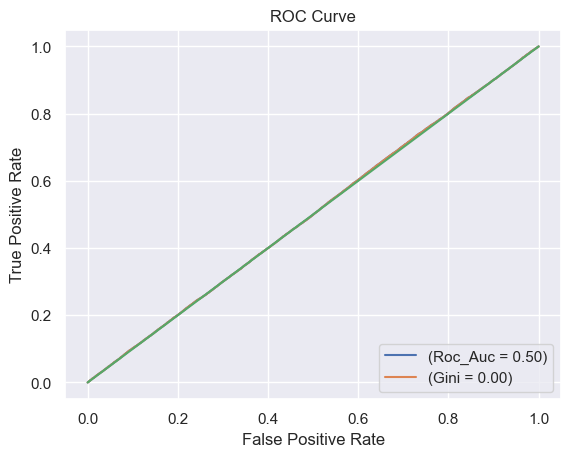

                                      
Model Performance for XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)
[[103614     82]
 [ 43432     32]]
              precision    recall  f1-score   support

           0       0.70      1.00      0.83    103696
           1       0.28      0.00      0.00     43464

    accuracy              

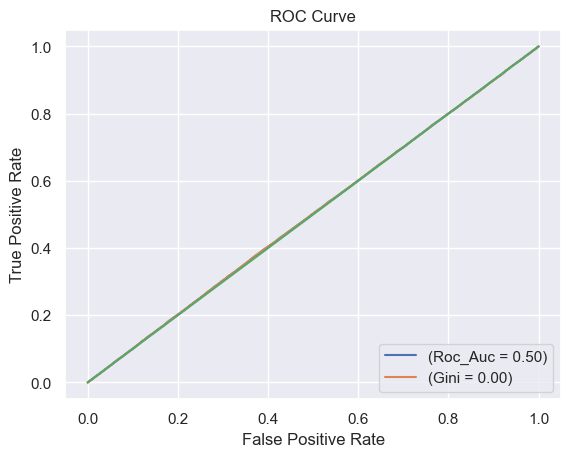

C:\Users\Nutzer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nutzer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model Performance for LGBMClassifier()
[[103694      2]
 [ 43464      0]]
              precision    recall  f1-score   support

           0       0.70      1.00      0.83    103696
           1       0.00      0.00      0.00     43464

    accuracy                           0.70    147160
   macro avg       0.35      0.50      0.41    147160
weighted avg       0.50      0.70      0.58    147160

                                      
AUC Score: 50.25536346431583
Gini prob is 0.5107269286316551


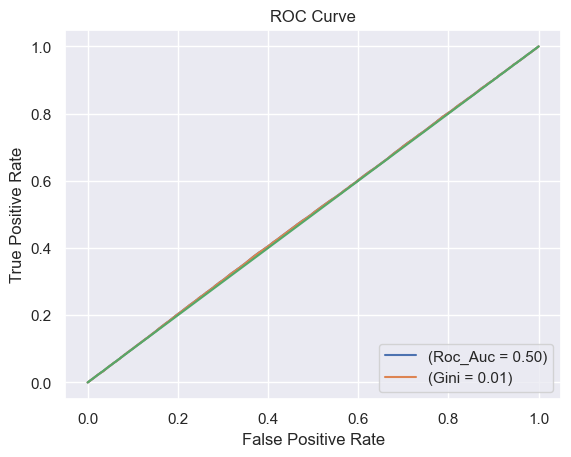

C:\Users\Nutzer\AppData\Local\Temp\ipykernel_416\464347706.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  models.fit(X_train, y_train)


Model Performance for RandomForestClassifier()
[[79708 23988]
 [33335 10129]]
              precision    recall  f1-score   support

           0       0.71      0.77      0.74    103696
           1       0.30      0.23      0.26     43464

    accuracy                           0.61    147160
   macro avg       0.50      0.50      0.50    147160
weighted avg       0.58      0.61      0.60    147160

                                      
AUC Score: 49.92796588494187
Gini prob is -0.14406823011625658


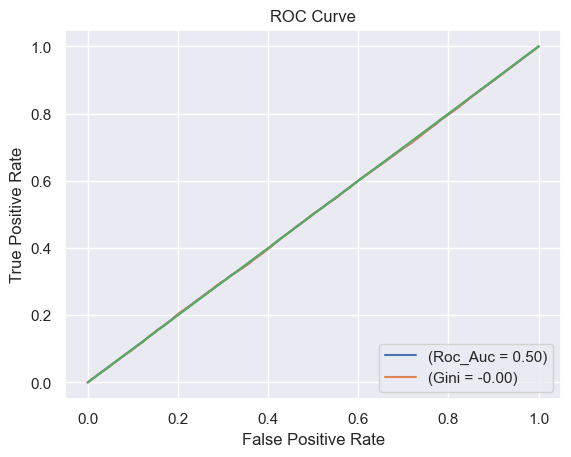

C:\Users\Nutzer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model Performance for LogisticRegression(class_weight='balanced')
[[43115 60581]
 [17961 25503]]
              precision    recall  f1-score   support

           0       0.71      0.42      0.52    103696
           1       0.30      0.59      0.39     43464

    accuracy                           0.47    147160
   macro avg       0.50      0.50      0.46    147160
weighted avg       0.58      0.47      0.49    147160

                                      
AUC Score: 50.13903904573047
Gini prob is 0.27807809146094264


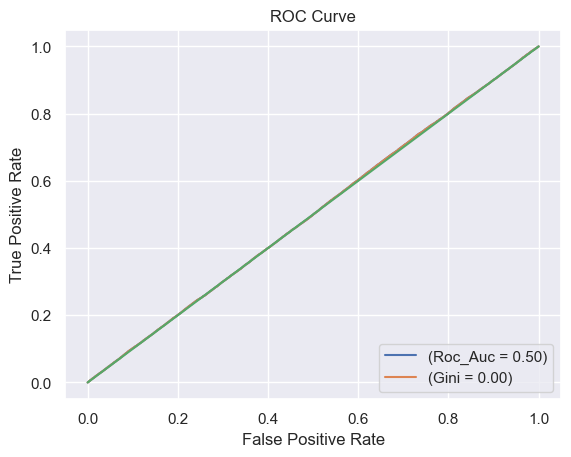

In [56]:
for i in models:
    models=i
    models.fit(X_train, y_train)
    
    y_pred = models.predict(X_test)
    y_prob = models.predict_proba(X_test)[:,1]


    roc_prob = roc_auc_score(y_test, y_prob)
    
    gini_prob = roc_prob*2-1
    
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
    
    
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    plt.figure()
    
    plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_prob)
    plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini_prob)
    plt.plot([0, 1], [0, 1])
    plt.xlim()
    plt.ylim()
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    
    
    print('Model Performance for',i)    
   
    print(confusion_matrix)
    print(classification_report(y_test, y_pred))
    print("                                      ")
    print('AUC Score:', roc_auc_score(y_test, y_prob)*100)
    print('Gini prob is', gini_prob*100)
    plt.show()
    print("="*70)
    print("                                      ")

### LogisticRegression shows better result than others, but model was build with default hyperparameters. Using grid search and cross validation i would like to choose best hyperparameters and increase power of the model

In [57]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'num_leaves': [15, 31, 63],
    'learning_rate': [0.01, 0.05, 0.1],
    'feature_fraction': [0.5, 0.7, 0.9],
    'max_depth': [-1, 5, 10]
}

clf = LGBMClassifier(boosting_type='gbdt', objective='binary', metric='auc')
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

C:\Users\Nutzer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nutzer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


GridSearchCV(cv=5, estimator=LGBMClassifier(metric='auc', objective='binary'),
             n_jobs=-1,
             param_grid={'feature_fraction': [0.5, 0.7, 0.9],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [-1, 5, 10], 'num_leaves': [15, 31, 63]})

In [58]:
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best hyperparameters:  {'feature_fraction': 0.9, 'learning_rate': 0.1, 'max_depth': 5, 'num_leaves': 15}
Best score:  0.7064329461324684


In [59]:
best_params = grid_search.best_params_
clf = LGBMClassifier(boosting_type='gbdt', objective='binary', metric='binary_logloss', **best_params)
clf.fit(X_train, y_train)

C:\Users\Nutzer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nutzer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMClassifier(feature_fraction=0.9, max_depth=5, metric='binary_logloss',
               num_leaves=15, objective='binary')

In [60]:
y_prob = clf.predict_proba(X_test)[:,1]


roc_prob = roc_auc_score(y_test, y_prob)
    
gini_prob = roc_prob*2-1

gini_prob

0.004508377943691411

# Deployment

### Lets imagine our choosen model is accepted and we have to deploy model on new customers

In [64]:
X

,trans_price_avg_lst3,payment,debt_to_income_ratio,income_per_age_group
0,147.0,36.75,0.009196,999.0
1,150.0,37.50,0.003472,43200.0
2,140.0,35.00,0.001994,35100.0
3,136.0,34.00,0.001448,46950.0
4,181.0,45.25,0.002351,19250.0
...,...,...,...,...
490528,27.0,6.75,0.000667,10125.0
490529,127.0,31.75,0.002829,22450.0
490530,157.0,39.25,0.003224,24350.0
490531,171.0,42.75,0.009196,1900.0


In [65]:
data = {
        'payment': [250,320,140,180,300,500,800,600,350,100],
        'debt_to_income_ratio': [0.003472,0.002829, 0.009196, 0.002351,0.003472,0.003196,0.004246,0.002351,0.008351,0.003431],
       'income_per_age_group': [999.0,45.800, 24.300,76.500,999.0,100.500,247.800,34.500,65.900,57.800],
        'trans_price_avg_lst3':[170,200,340,125,90,150,420,230,145,650]}
 
# Create DataFrame
new_df = pd.DataFrame(data)
new_df

,payment,debt_to_income_ratio,income_per_age_group,trans_price_avg_lst3
0,250,0.003472,999.0,170
1,320,0.002829,45.8,200
2,140,0.009196,24.3,340
3,180,0.002351,76.5,125
4,300,0.003472,999.0,90
5,500,0.003196,100.5,150
6,800,0.004246,247.8,420
7,600,0.002351,34.5,230
8,350,0.008351,65.9,145
9,100,0.003431,57.8,650


In [66]:
new_pred=clf.predict_proba(new_df)[:,1]

In [67]:
new_df['Probability_of_default (%)'] = new_pred

new_df

,payment,debt_to_income_ratio,income_per_age_group,trans_price_avg_lst3,Probability_of_default (%)
0,250,0.003472,999.0,170,0.142303
1,320,0.002829,45.8,200,0.142303
2,140,0.009196,24.3,340,0.142303
3,180,0.002351,76.5,125,0.142303
4,300,0.003472,999.0,90,0.142303
5,500,0.003196,100.5,150,0.142303
6,800,0.004246,247.8,420,0.142303
7,600,0.002351,34.5,230,0.142303
8,350,0.008351,65.9,145,0.142303
9,100,0.003431,57.8,650,0.142303
